# IonQ Quantum Challenge #1

Task1
- Fair coin

Task2
- Make board 'area'

How can we make fair coin?

1. Hadamard gate is fair coin?

In [2]:
from qiskit import *

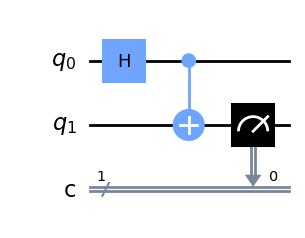

In [24]:
## Make circuit

qc = QuantumCircuit(2,1)
qc.h(0)
qc.cx(0,1)
qc.measure([1], [0])
qc.draw('mpl')

We can see result is almost 50%. But how about the trial getting longer?

- First we have to make QFT adder

- Make the board area(task2)

In [487]:
from qiskit.circuit.library import QFT
import numpy as np
def QFT_adder(num_qubits,add_space=1):
    qc = QuantumCircuit(num_qubits)
    qc.append(QFT(num_qubits-add_space,do_swaps=False),[i+add_space for i in range(num_qubits-add_space)])
    for j in range(add_space):
        for i in range(num_qubits-add_space-j):
            qc.cp(np.pi*(1/2)**(i),j,add_space+i+j)

    qc.append(QFT(num_qubits-add_space,inverse=True,do_swaps=False),[i+add_space for i in range(num_qubits-add_space)])
    return qc
    

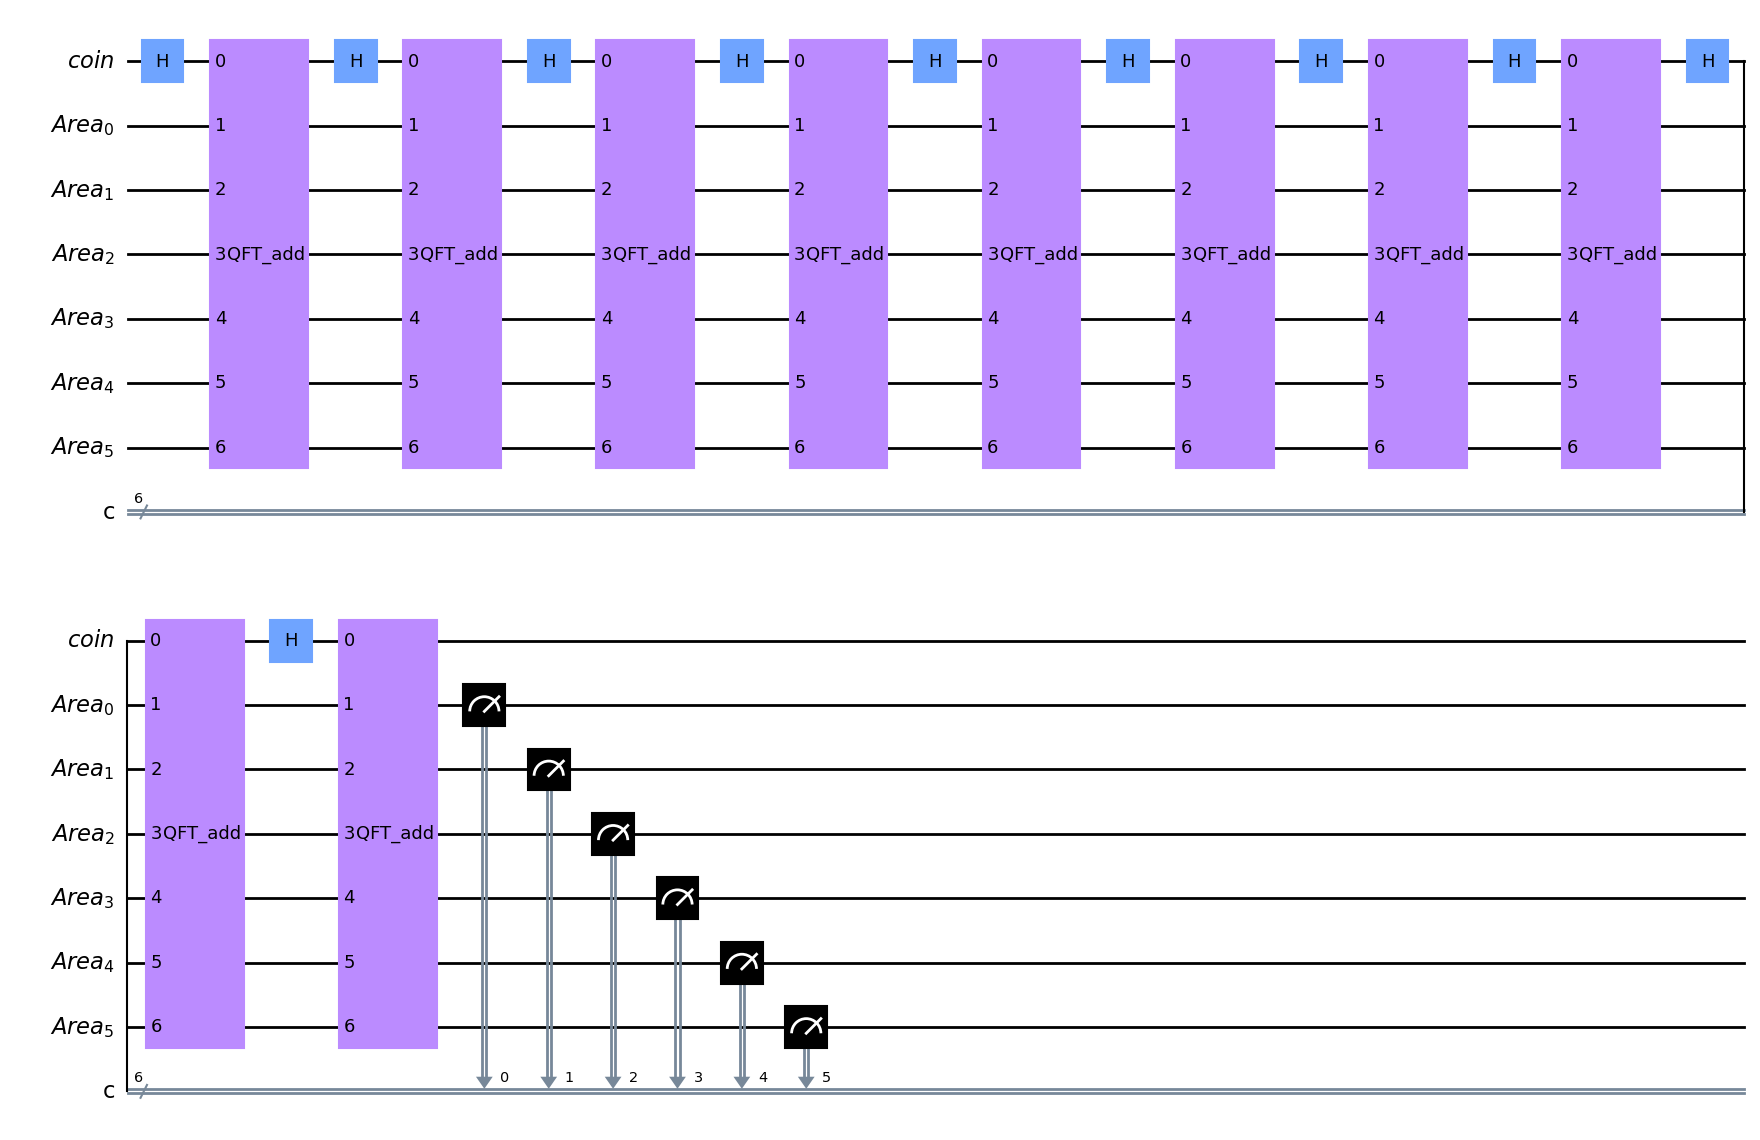

In [360]:
temp = QFT_adder(7)
QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
qc_res = QuantumRegister(1,name='coin')
qc_res1 = QuantumRegister(6,name='Area')
cr = ClassicalRegister(6, 'c')
qc = QuantumCircuit(qc_res,qc_res1,cr)
qc.h(0)    
qc.append(QFT_add,qc.qubits)
qc.h(0)     
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)    
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.measure([1,2,3,4,5,6],[0,1,2,3,4,5])
qc.draw('mpl')

In [361]:
## run circuit
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
sampler = Sampler(options={'seed':1024})
result = sampler.run(qc).result().quasi_dists[0]

Text(0, 0.5, 'probability')

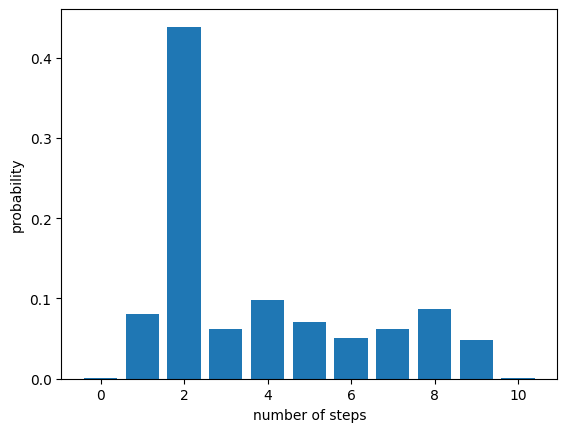

In [362]:
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.ylabel('probability')

We can see this coin is not fair.

Because H|0> = 1/sqrt(2)(|0>-|1>),
the minus phase brake the symmetry

# How can we make 'fair' coin?

1. use initial state $1/sqrt(2)(|0>+i|1>)$ as a a coin


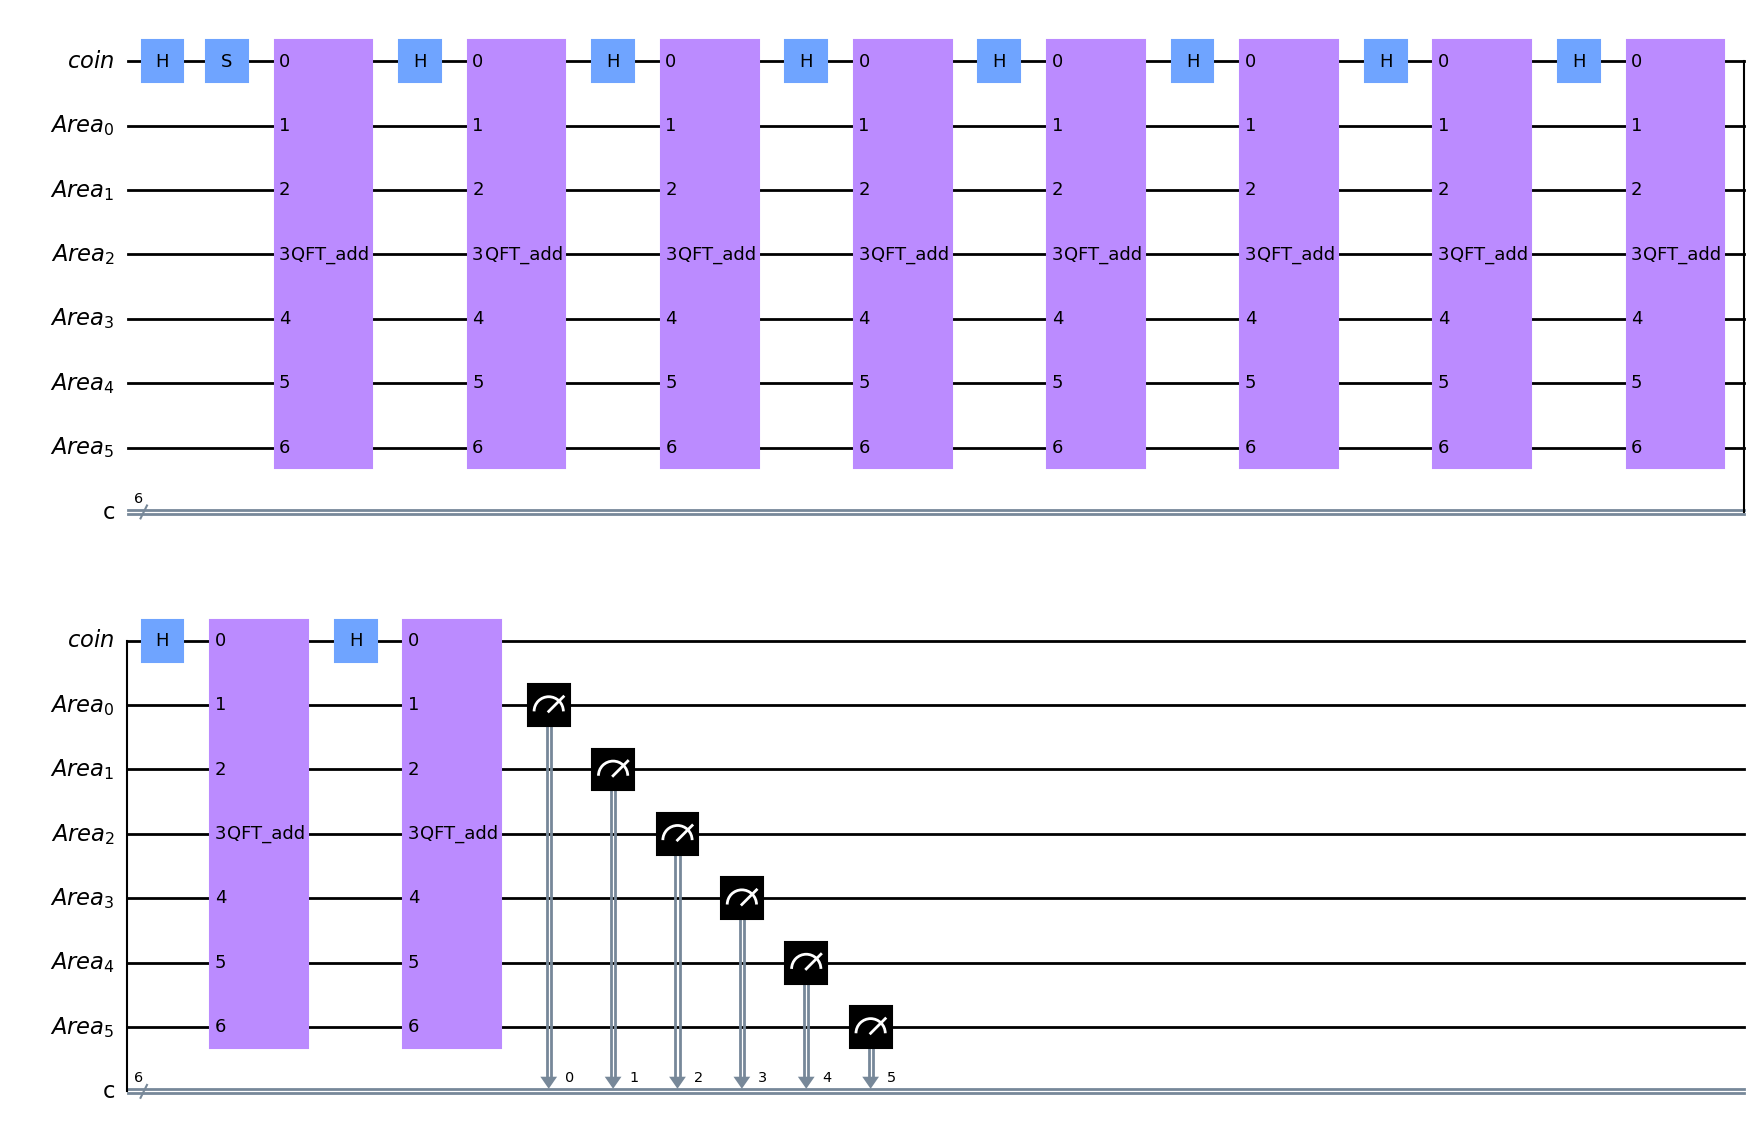

In [399]:
temp = QFT_adder(7)
QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
qc_res = QuantumRegister(1,name='coin')
qc_res1 = QuantumRegister(6,name='Area')
cr = ClassicalRegister(6, 'c')
qc = QuantumCircuit(qc_res,qc_res1,cr)
qc.h(0)
qc.s(0)    
qc.append(QFT_add,qc.qubits)
qc.h(0)     
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)    
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.h(0)   
qc.append(QFT_add,qc.qubits)
qc.measure([1,2,3,4,5,6],[0,1,2,3,4,5])
qc.draw('mpl')

In [400]:
## run circuit
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
sampler = Sampler(options={'seed':1024})
result = sampler.run(qc).result().quasi_dists[0]

## Now result have symmetry!

Text(0, 0.5, 'probability')

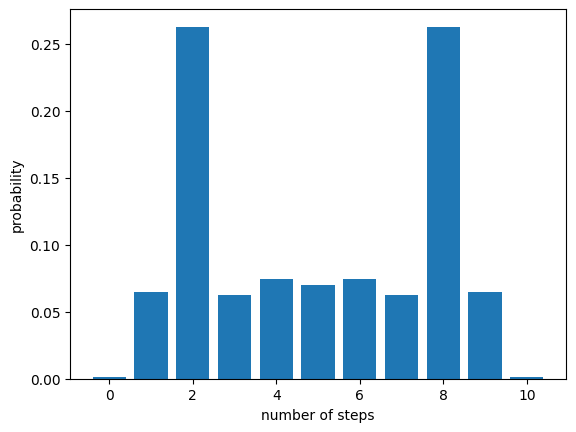

In [401]:
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.ylabel('probability')

# Four sided coin 

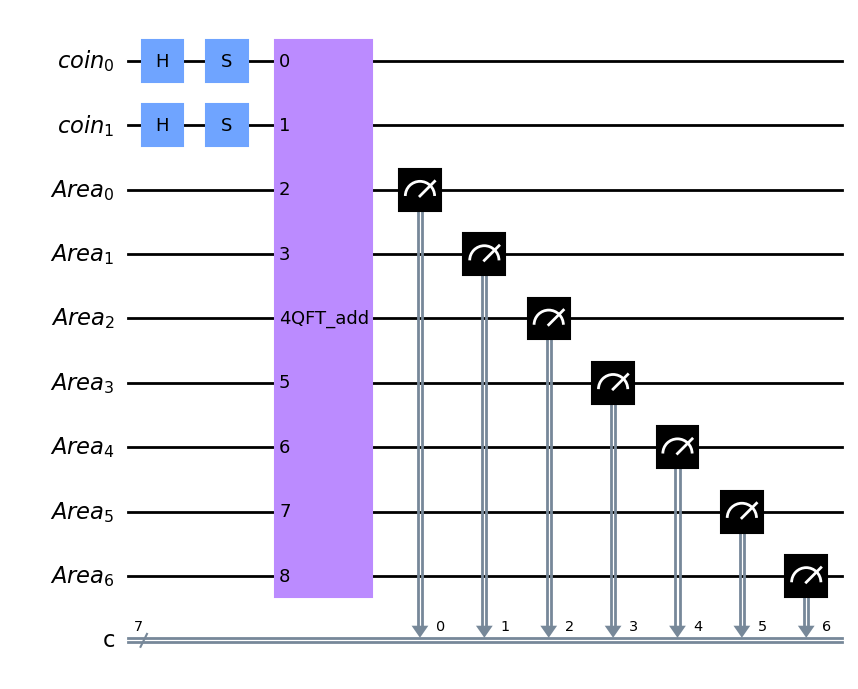

In [480]:
temp = QFT_adder(9,2)
QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
qc_res = QuantumRegister(2,name='coin')
qc_res1 = QuantumRegister(7,name='Area')
cr = ClassicalRegister(7, 'c')
qc = QuantumCircuit(qc_res,qc_res1,cr)
qc.h(1)
qc.s(1)
qc.h(0)
qc.s(0)    
qc.append(QFT_add,qc.qubits)
qc.measure([2,3,4,5,6,7,8],[0,1,2,3,4,5,6])
qc.draw('mpl')

In [481]:
## run circuit
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
sampler = Sampler(options={'seed':1024})
result = sampler.run(qc).result().quasi_dists[0]

## We can see each of probability is same

Text(0, 0.5, 'probability')

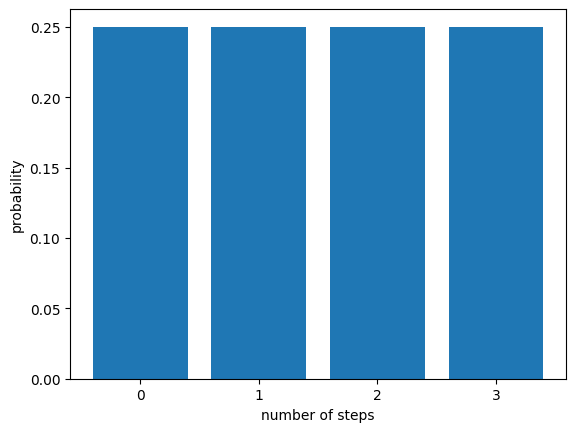

In [486]:
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 4, step=1), fontsize=10)
plt.ylabel('probability')

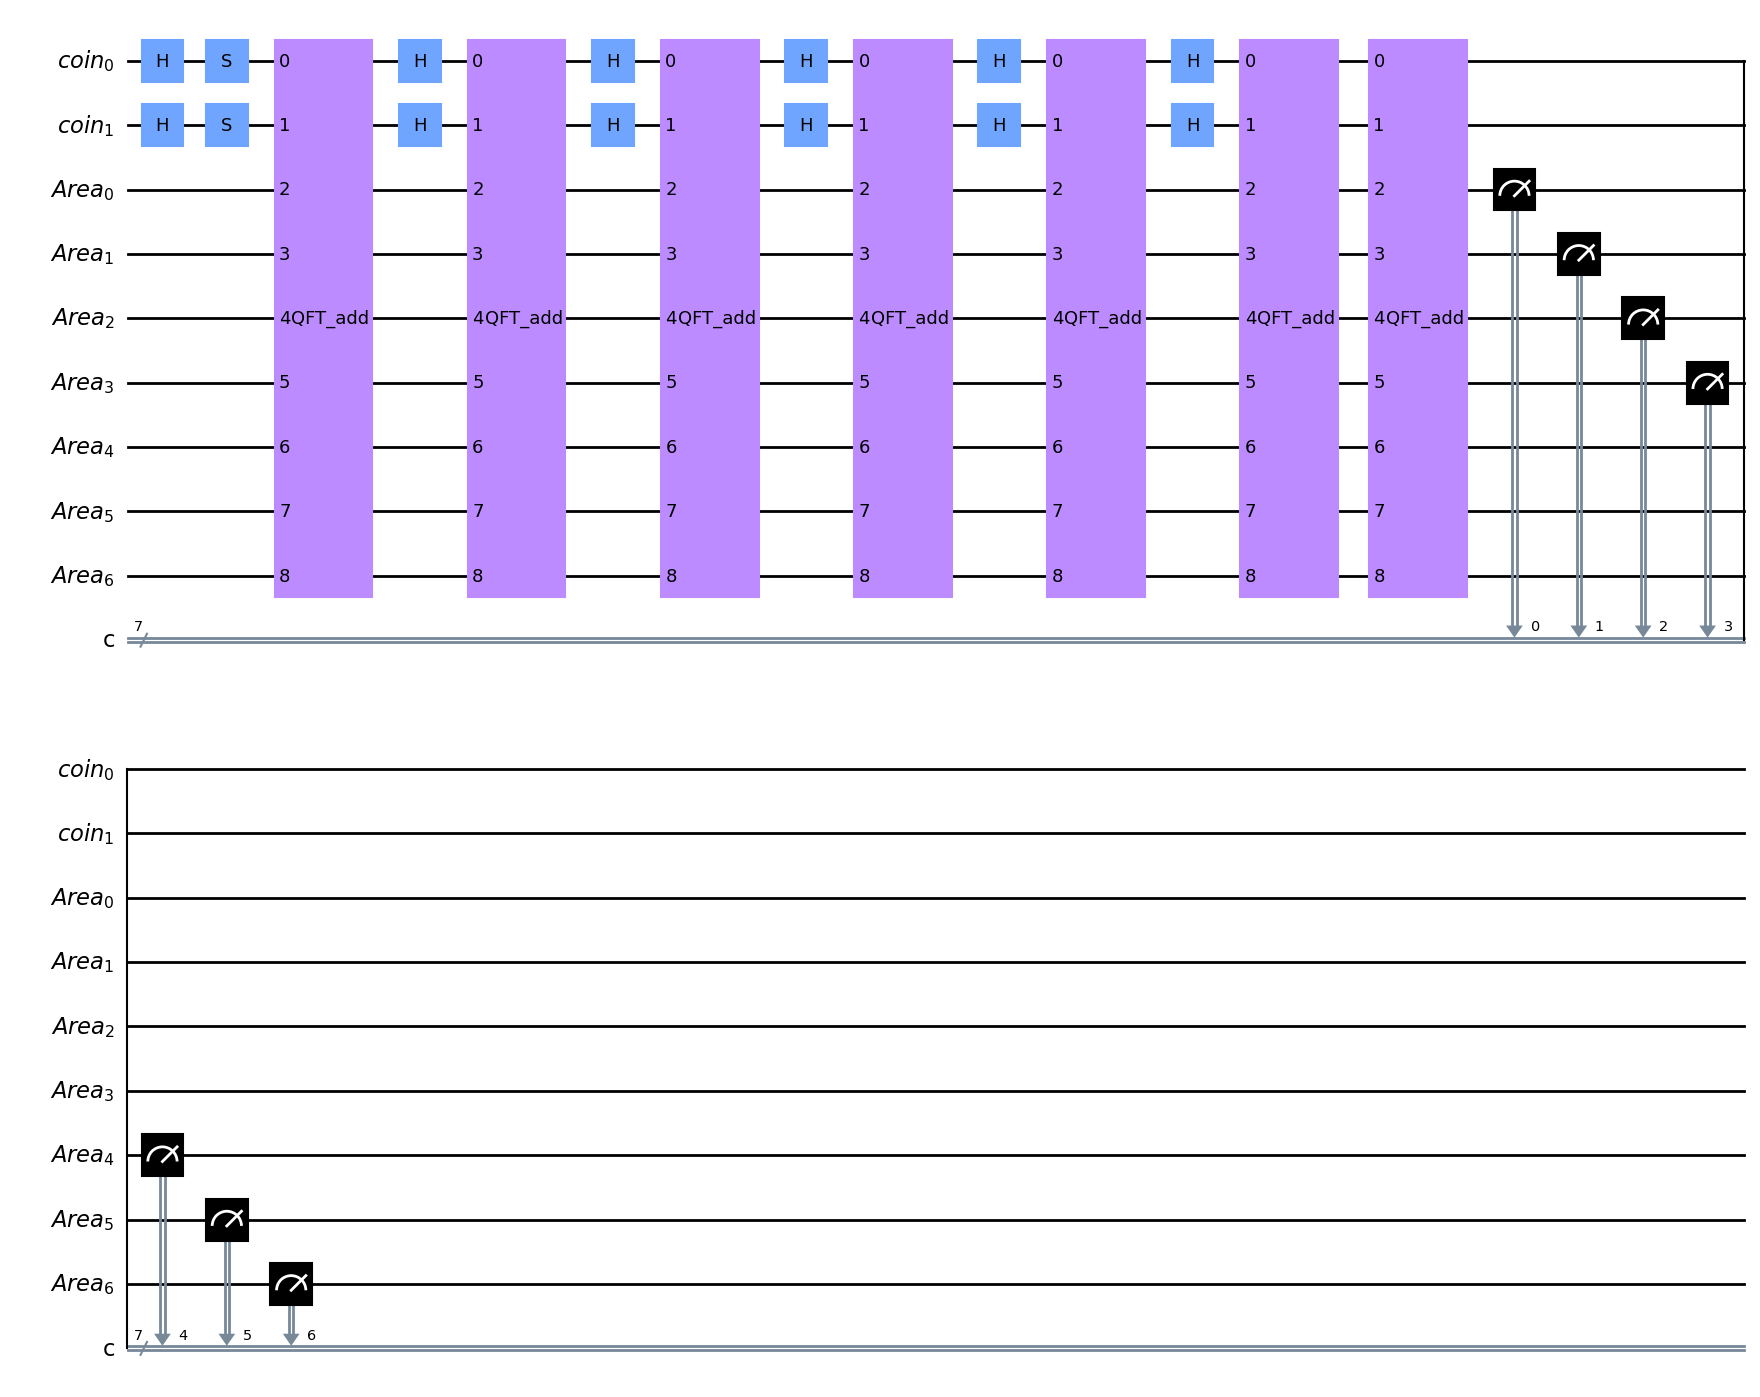

In [488]:
temp = QFT_adder(9,2)
QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
qc_res = QuantumRegister(2,name='coin')
qc_res1 = QuantumRegister(7,name='Area')
cr = ClassicalRegister(7, 'c')
qc = QuantumCircuit(qc_res,qc_res1,cr)
qc.h(1)
qc.s(1)
qc.h(0)
qc.s(0)
qc.append(QFT_add,qc.qubits)
for i in range(5):
    qc.h(0)
    qc.h(1)
    qc.append(QFT_add,qc.qubits)
qc.append(QFT_add,qc.qubits)
qc.measure([2,3,4,5,6,7,8],[0,1,2,3,4,5,6])
qc.draw('mpl')

In [489]:
## run circuit
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
sampler = Sampler(options={'seed':1024})
result = sampler.run(qc).result().quasi_dists[0]

Text(0, 0.5, 'probability')

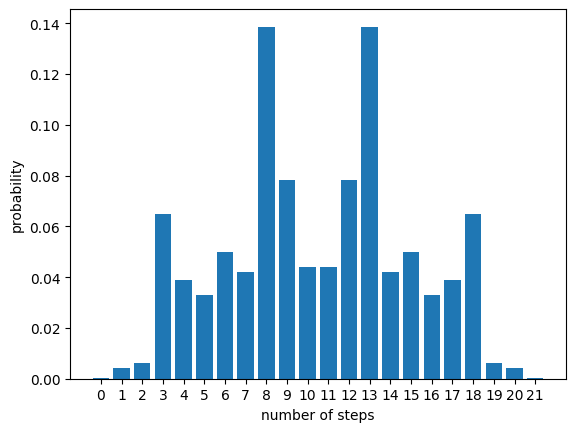

In [494]:
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 22, step=1), fontsize=10)
plt.ylabel('probability')

For Task2, Actually the game is end when the value is 15, we can set up only 5~6 qubits in area qubits.

# Task3

In [639]:

def Q_board_game_1_coin(reps=1):
    temp = QFT_adder(7,1)
    QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
    qc_res = QuantumRegister(1,name='coin')
    qc_res1 = QuantumRegister(6,name='Area')
    cr = ClassicalRegister(6, 'c')
    qc_1 = QuantumCircuit(qc_res,qc_res1,cr)
    qc_1.h(0)
    qc_1.s(0)
    qc_1.append(QFT_add,qc_1.qubits)
    for i in range(reps-1):
        qc_1.h(0)
        qc_1.append(QFT_add,qc_1.qubits)
    qc_1.measure([i+1 for i in range(6)],[i for i in range(6)])
    sampler = Sampler(options={'seed':1024})
    result = sampler.run(qc_1).result().quasi_dists[0]
    return result
    
def Q_board_game_2_coin(reps=1):
    temp = QFT_adder(8,2)
    QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
    qc_res = QuantumRegister(2,name='coin')
    qc_res1 = QuantumRegister(6,name='Area')
    cr = ClassicalRegister(6, 'c')
    qc_1 = QuantumCircuit(qc_res,qc_res1,cr)
    qc_1.h(0)
    qc_1.s(0)
    qc_1.h(1)
    qc_1.s(1)
    qc_1.append(QFT_add,qc_1.qubits)
    for i in range(reps-1):
        qc_1.h(0)
        qc_1.h(1)
        qc_1.append(QFT_add,qc_1.qubits)
    qc_1.measure([i+2 for i in range(6)],[i for i in range(6)])
    sampler = Sampler(options={'seed':1024})
    result = sampler.run(qc_1).result().quasi_dists[0]
    return result

    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


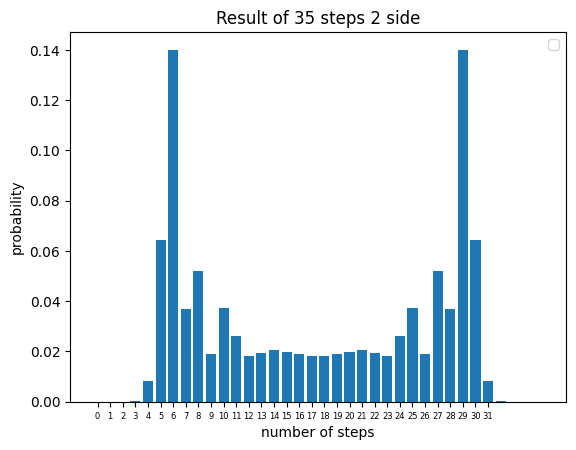

In [1009]:
## input the reps
steps = 35
result = Q_board_game_1_coin(steps)
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 32, step=1), fontsize=6)
plt.ylabel('probability')
plt.title(f'Result of {steps} steps 2 side')
plt.legend()
plt.show()

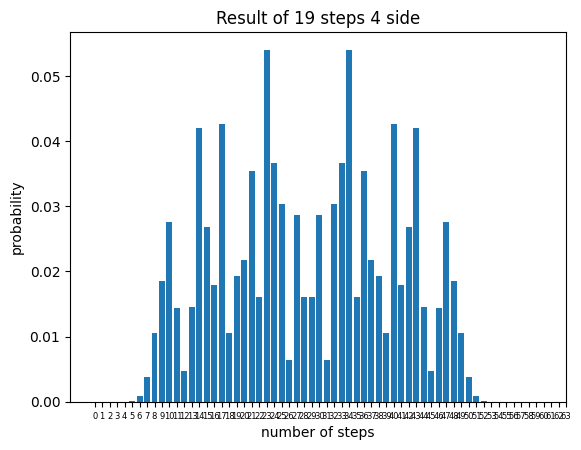

In [1018]:
## input the reps
steps = 19
result = Q_board_game_2_coin(steps)
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 64, step=1), fontsize=6)
plt.title(f'Result of {steps} steps 4 side')
plt.ylabel('probability')
plt.show()

## Task 4

Object : 9 -> 13 , 13 -> 9, 3 -> 10, 10 -> 3 at each layer

Circuit detail is written in challenge1.docx

In [547]:
print('Each of value in binary bit')
print(9,':',format(9,'b').zfill(6))
print(13,':',format(13,'b').zfill(6))
print(10,':',format(10,'b').zfill(6))
print(3,':',format(3,'b').zfill(6))

Each of value in binary bit
9 : 001001
13 : 001101
10 : 001010
3 : 000011


We need to minus the result when location is 13, 10

In [689]:
from qiskit.circuit.library import QFT
import numpy as np
def QFT_minus(num_qubits,add_space=1):
    qc = QuantumCircuit(num_qubits)
    qc.append(QFT(num_qubits-add_space,do_swaps=False),[i+add_space for i in range(num_qubits-add_space)])
    for j in range(add_space):
        for i in range(num_qubits-add_space-j):
            qc.cp(-np.pi*(1/2)**(i),j,add_space+i+j)

    qc.append(QFT(num_qubits-add_space,inverse=True,do_swaps=False),[i+add_space for i in range(num_qubits-add_space)])
    return qc

In [1003]:
from qiskit.circuit.library import MCXGate

def Q_board_game_2_coin_ladder(reps=1):
    temp_ancilla = QFT_adder(9,3)
    QFT_adder1 = temp_ancilla.decompose(reps=4).to_gate(label='QFT_adder')
    
    temp_ancilla1 = QFT_minus(9,3)
    QFT_minus1 = temp_ancilla1.decompose(reps=4).to_gate(label='QFT_minus')
    
    
    ## Check the state is in the ladder and push up or down
    def add_minus_num(target,num,qc_1):
        
        for i in range(len(format(target,'b').zfill(6))):
            if (format(target,'b')).zfill(6)[i]!=(format(target+num,'b')).zfill(6)[i]:
                index1 = 5-i
                break
        
        
        
       
        ## add x        
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(6,ctrl_state=format(target,'b').zfill(6)),([i+2 for i in range(6)]+[i+8]))
        qc_1.append(MCXGate(6,ctrl_state=format(target,'b').zfill(6)),([i+2 for i in range(6)]+[11]))
                
    
        
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(6,ctrl_state=format(target+num,'b').zfill(6)),([i+2 for i in range(6)]+[i+8]))   
      
                
        for i in range(len(format(target,'b').zfill(6))):
            if (format(target,'b')).zfill(6)[i]!=(format(target+num,'b')).zfill(6)[i]:
                index1 = 5-i
                break
                
            

        C1 = QFT_adder1.control(1)
        C2 = QFT_minus1.control(1,ctrl_state=0)
        ## QFT add   

        qc_1.append(C1,[11]+[8+i for i in range(3)]+[i+2 for i in range(6)])
        qc_1.append(C2,[11]+[8+i for i in range(3)]+[i+2 for i in range(6)])
        ## remove x        
        ## find index
         
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(6,ctrl_state=format(target,'b').zfill(6)),([i+2 for i in range(6)]+[i+8]))

   
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(6,ctrl_state=format(target+num,'b').zfill(6)),([i+2 for i in range(6)]+[i+8]))   
        qc_1.append(MCXGate(6,ctrl_state=format(target+num,'b').zfill(6)),([i+2 for i in range(6)]+[11]))       


        
        
        
        
    temp = QFT_adder(8,2)
    QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
    qc_res = QuantumRegister(2,name='coin')
    qc_ancilla = QuantumRegister(3,name='AncillaRegister')
    qc_sub_ancilla = QuantumRegister(1,name='sub_AncillaRegister')
    qc_res1 = QuantumRegister(6,name='Area')
    cr = ClassicalRegister(6, 'c')
    qc_1 = QuantumCircuit(qc_res,qc_res1,qc_ancilla,qc_sub_ancilla,cr)
    qc_1.h(0)
    qc_1.s(0)
    qc_1.h(1)
    qc_1.s(1)
    qc_1.append(QFT_add,[i for i in range(8)])
    add_minus_num(3,7,qc_1)
    add_minus_num(9,4,qc_1)
    

    for i in range(reps-1):
        qc_1.h(0)
        qc_1.h(1)
        qc_1.append(QFT_add,[i for i in range(8)])
        add_minus_num(3,7,qc_1)
        add_minus_num(9,4,qc_1)
        
    
    

    qc_1.measure([i+2 for i in range(6)],[i for i in range(6)])
    sampler = Sampler(options={'seed':1024})
    result = sampler.run(qc_1).result().quasi_dists[0]
    return result

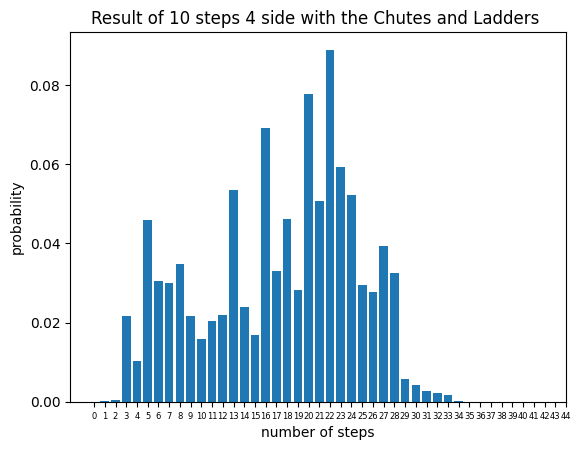

In [1019]:
steps = 10
result = Q_board_game_2_coin_ladder(steps)
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 45, step=1), fontsize=6)
plt.title(f'Result of {steps} steps 4 side with the Chutes and Ladders ')
plt.ylabel('probability')
plt.show()

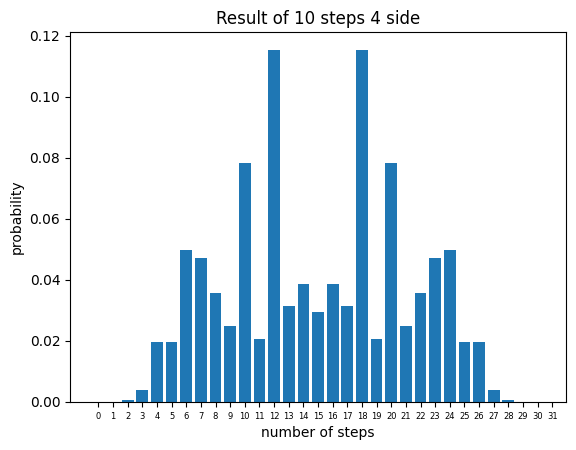

In [1007]:
## input the reps
steps = 10
result = Q_board_game_2_coin(steps)
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 32, step=1), fontsize=6)
plt.title(f'Result of {steps} steps 4 side')
plt.ylabel('probability')
plt.show()

In [1048]:
from qiskit.circuit.library import MCXGate

def Q_board_game_1_coin_ladder(reps=1):
    temp_ancilla = QFT_adder(10,3)
    QFT_adder1 = temp_ancilla.decompose(reps=4).to_gate(label='QFT_adder')
    
    temp_ancilla1 = QFT_minus(10,3)
    QFT_minus1 = temp_ancilla1.decompose(reps=4).to_gate(label='QFT_minus')
    
    
    ## Check the state is in the ladder and push up or down
    def add_minus_num(target,num,qc_1):
        
        for i in range(len(format(target,'b').zfill(7))):
            if (format(target,'b')).zfill(7)[i]!=(format(target+num,'b')).zfill(7)[i]:
                index1 = 5-i
                break
        
        
        
       
        ## add x        
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(7,ctrl_state=format(target,'b').zfill(7)),([i+1 for i in range(7)]+[i+8]))
        qc_1.append(MCXGate(7,ctrl_state=format(target,'b').zfill(7)),([i+1 for i in range(7)]+[11]))
                
    
        
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(7,ctrl_state=format(target+num,'b').zfill(7)),([i+1 for i in range(7)]+[i+8]))   
      
                
        for i in range(len(format(target,'b').zfill(7))):
            if (format(target,'b')).zfill(7)[i]!=(format(target+num,'b')).zfill(7)[i]:
                index1 = 5-i
                break
                
            

        C1 = QFT_adder1.control(1)
        C2 = QFT_minus1.control(1,ctrl_state=0)
        ## QFT add   

        qc_1.append(C1,[11]+[8+i for i in range(3)]+[i+1 for i in range(7)])
        qc_1.append(C2,[11]+[8+i for i in range(3)]+[i+1 for i in range(7)])
        ## remove x        
        ## find index
         
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(7,ctrl_state=format(target,'b').zfill(7)),([i+1 for i in range(7)]+[i+8]))

   
        for i in range(len(format(abs(num),'b').zfill(5))):
            if format(abs(num),'b').zfill(5)[-(i+1)]=='1':
                qc_1.append(MCXGate(7,ctrl_state=format(target+num,'b').zfill(7)),([i+1 for i in range(7)]+[i+8]))   
        qc_1.append(MCXGate(7,ctrl_state=format(target+num,'b').zfill(7)),([i+1 for i in range(7)]+[11]))       


        
        
        
        
    temp = QFT_adder(8,1)
    QFT_add = temp.decompose(reps=4).to_gate(label='QFT_add')
    qc_res = QuantumRegister(1,name='coin')
    qc_ancilla = QuantumRegister(3,name='AncillaRegister')
    qc_sub_ancilla = QuantumRegister(1,name='sub_AncillaRegister')
    qc_res1 = QuantumRegister(7,name='Area')
    cr = ClassicalRegister(7, 'c')
    qc_1 = QuantumCircuit(qc_res,qc_res1,qc_ancilla,qc_sub_ancilla,cr)
    qc_1.h(0)
    qc_1.s(0)
    qc_1.append(QFT_add,[i for i in range(8)])
    add_minus_num(3,7,qc_1)
    add_minus_num(9,4,qc_1)
    

    for i in range(reps-1):
        qc_1.h(0)
        qc_1.append(QFT_add,[i for i in range(8)])
        add_minus_num(3,7,qc_1)
        add_minus_num(9,4,qc_1)
        
    
    

    qc_1.measure([i+1 for i in range(7)],[i for i in range(7)])
    sampler = Sampler(options={'seed':1024})
    result = sampler.run(qc_1).result().quasi_dists[0]
    return result

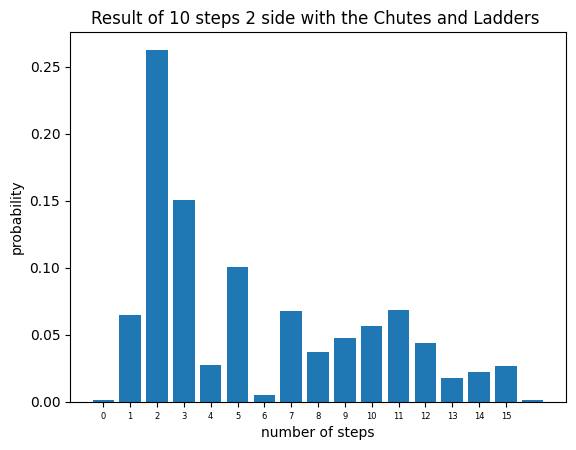

In [1052]:
steps = 10
result = Q_board_game_1_coin_ladder(steps)
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 16, step=1), fontsize=6)
plt.title(f'Result of {steps} steps 2 side with the Chutes and Ladders ')
plt.ylabel('probability')
plt.show()

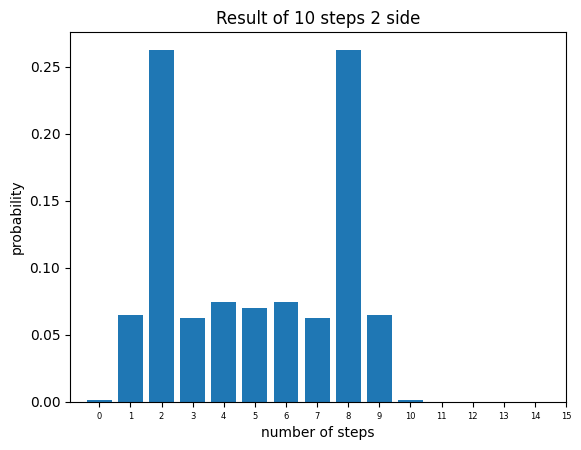

In [1051]:
## input the reps
steps = 10
result = Q_board_game_1_coin(steps)
plt.bar(np.array(list(result.keys())),result.values())
plt.xlabel('number of steps')
plt.xticks(np.arange(0, 16, step=1), fontsize=6)
plt.title(f'Result of {steps} steps 2 side')
plt.ylabel('probability')
plt.show()